In [1]:
#Importing the librarys
import pandas as pd
import numpy as np

In [2]:
#Read the data
data=pd.read_excel('../input/flight-fare-prediction-mh/Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
#check any missing values present in the dataset
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

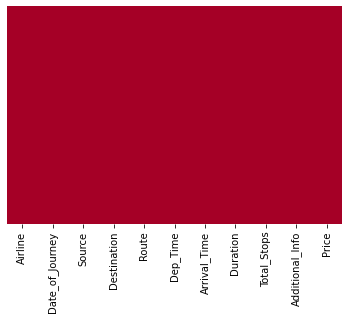

In [8]:
#Visualize the missing values by a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='RdYlGn')

In [9]:
print(data[data['Route'].isnull()])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [10]:
print(data[data['Total_Stops'].isnull()])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [11]:
#remove the misssing values 
data.dropna(inplace=True)

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
data.isnull().mean()

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

In [14]:
#create a separete features for date of journey "y%m%d"

data['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [15]:
#extract the date of the journey
data['date_of_journey']=pd.to_datetime(data['Date_of_Journey']).dt.day


In [16]:
data['month_of_journey']=pd.to_datetime(data['Date_of_Journey']).dt.month

In [17]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [18]:
#drop the Date_of_Journey column
data.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [20]:
data['Route'].nunique()

128

In [21]:
data.shape

(10682, 12)

In [22]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [23]:
data.drop('Route',1,inplace=True)


In [24]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [25]:
#Dep_Time is in time format 'H:M'

data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_minute']=pd.to_datetime(data['Dep_Time']).dt.minute

In [26]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [27]:
#drop the Dep_Time column
data.drop('Dep_Time',1,inplace=True)

In [28]:
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [29]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_minute']=pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop('Arrival_Time',axis=1,inplace=True)

In [30]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [31]:
duration=data['Duration'].tolist()

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]
            
duration_hours=[]
duration_minutes=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep= 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [32]:
data['Duration_hours']=duration_hours
data['Duration_minutes']=duration_minutes

In [33]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [34]:
data.drop('Duration',axis=1,inplace=True)

In [35]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [36]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [37]:
print(len(data[data['Additional_Info']=='No info']))

8344


In [38]:
data['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [39]:
#Additional_Info column has more No info so we can drop the column

data.drop('Additional_Info',axis=1,inplace=True)

In [40]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


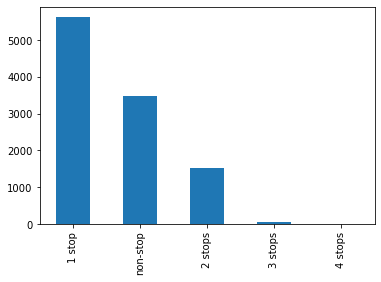

In [41]:
data['Total_Stops'].value_counts().plot(kind='bar')

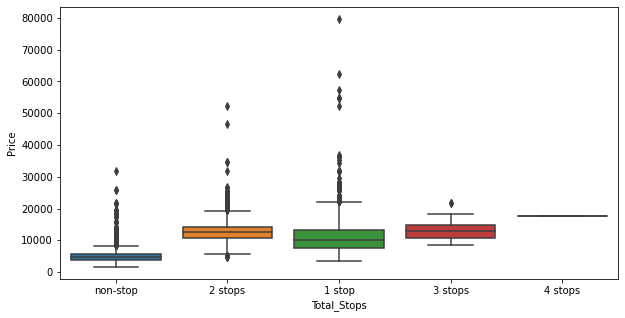

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=data)

In [43]:
#Total stop is an ordinal category so we assign rankings for each stop

total_stops={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

data['Total_Stops']=data['Total_Stops'].map(total_stops)

In [44]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

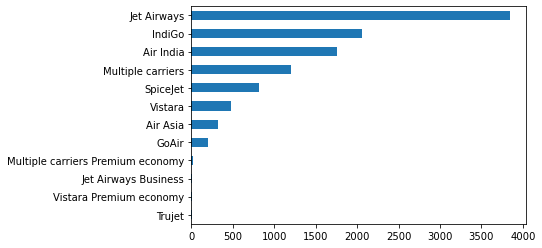

In [45]:
data['Airline'].value_counts().sort_values(ascending=True).plot(kind='barh')

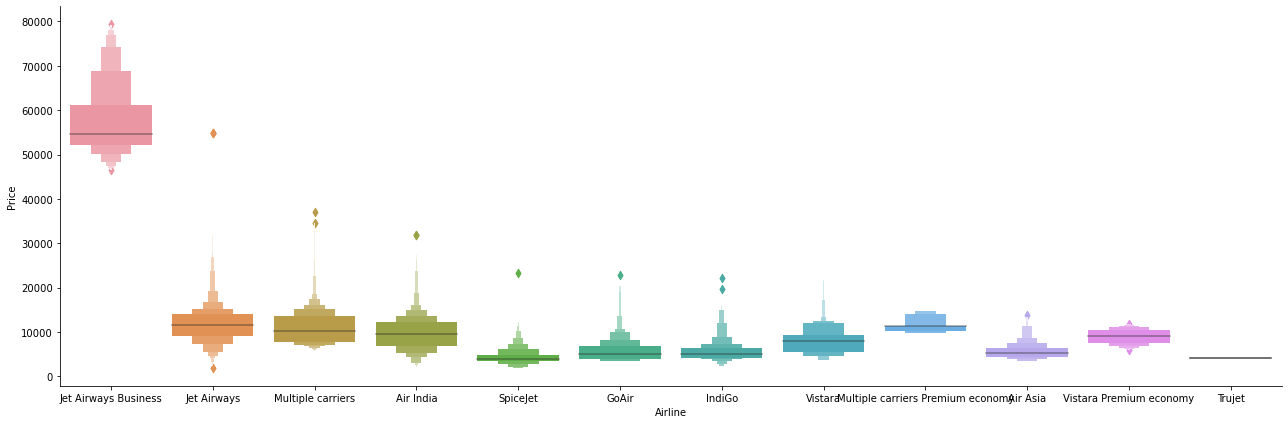

In [46]:
sns.catplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6)

In [47]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [48]:
airline=pd.get_dummies(data['Airline'],drop_first=True)
airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


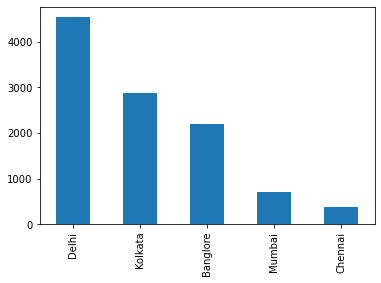

In [49]:
data['Source'].value_counts().plot(kind='bar')

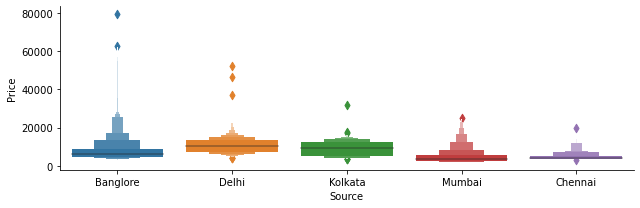

In [50]:
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=3,aspect=3)

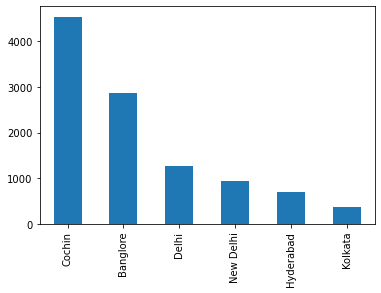

In [51]:
data['Destination'].value_counts().plot(kind='bar')

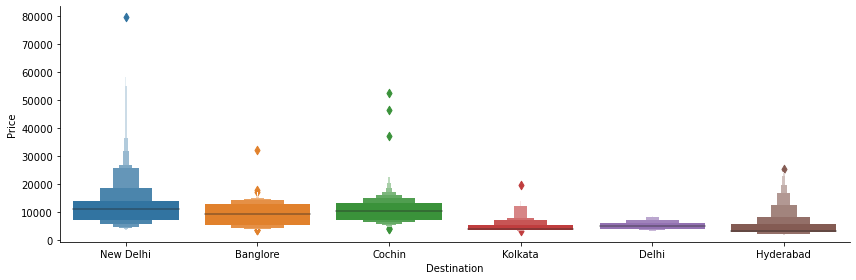

In [52]:
sns.catplot(x='Destination',y='Price',data=data,kind='boxen',height=4,aspect=3)

In [53]:
source=pd.get_dummies(data['Source'],drop_first=True)
destination=pd.get_dummies(data['Destination'],drop_first=True)

In [54]:
data=pd.concat([data,airline,source,destination],axis=1)

In [55]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [56]:
data.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [57]:
data.head()

,Total_Stops,Price,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [58]:
data.columns

Index(['Total_Stops', 'Price', 'date_of_journey', 'month_of_journey',
       'Dep_Hour', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duration_minutes', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [59]:
data.shape

(10682, 30)

In [60]:
data=data[['Total_Stops', 'date_of_journey', 'month_of_journey',
       'Dep_Hour', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duration_minutes', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi','Price']]

In [61]:
data.head()

,Total_Stops,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,...,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Price
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,3897
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,0,0,0,1,0,0,7662
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,1,0,0,0,0,0,13882
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,0,0,0,1,0,0,6218
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,13302


In [62]:
test_data=pd.read_excel('../input/flight-fare-prediction-mh/Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [63]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["data_of_journey"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["month_of_journey"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_minute"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_minute"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_minutes"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [64]:
data_test.head()

,Total_Stops,data_of_journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [65]:
data.head()

,Total_Stops,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,...,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Price
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,3897
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,0,0,0,1,0,0,7662
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,1,0,0,0,0,0,13882
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,0,0,0,1,0,0,6218
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,13302


In [66]:
x=data.iloc[:,:-1]
y=data['Price']

In [67]:
x.head()

,Total_Stops,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,...,1,0,0,0,0,0,0,1,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,1,0,0,0,0,0,0,1,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [70]:
select=SelectKBest(score_func=chi2,k=30)
selected_data=select.fit(x,y)

In [71]:
selected_data.scores_

array([ 5780.6511269 , 27074.37391773,  6442.42534397, 11058.30699957,
       68390.2755877 , 18959.28305045, 50443.54934164, 58838.74318201,
       44466.48981875,  8671.13442353,  9370.15134061,  7889.34544254,
        6739.05976585, 10676.        ,  9287.55420071, 10669.        ,
        8665.56742221, 10681.        , 10065.86080218, 10679.        ,
       10076.96779858,  6021.99308417,  8985.44352475,  7632.76076868,
       10076.96779858,  9779.55865756,  6021.99308417,  6021.99308417,
        8985.44352475,  9779.55865756,  7632.76076868, 10076.96779858,
        9049.37783233])

In [72]:
select_feat=pd.DataFrame(selected_data.scores_,columns=['Score'])

In [73]:
select_feat

,Score
0,5780.651127
1,27074.373918
2,6442.425344
3,11058.307000
4,68390.275588
5,18959.283050
6,50443.549342
7,58838.743182
8,44466.489819
9,8671.134424


In [74]:
dfcolumns=pd.DataFrame(x.columns)
dfcolumns

,0
0,Total_Stops
1,date_of_journey
2,month_of_journey
3,Dep_Hour
4,Dep_minute
5,Arrival_hour
6,Arrival_minute
7,Duration_hours
8,Duration_minutes
9,Air India


In [75]:
final_feature=pd.concat([select_feat,dfcolumns],axis=1)

In [76]:
final_feature

,Score,0
0,5780.651127,Total_Stops
1,27074.373918,date_of_journey
2,6442.425344,month_of_journey
3,11058.307000,Dep_Hour
4,68390.275588,Dep_minute
5,18959.283050,Arrival_hour
6,50443.549342,Arrival_minute
7,58838.743182,Duration_hours
8,44466.489819,Duration_minutes
9,8671.134424,Air India


In [77]:
final_feature.columns=['Score','features']
final_feature.head()

,Score,features
0,5780.651127,Total_Stops
1,27074.373918,date_of_journey
2,6442.425344,month_of_journey
3,11058.307000,Dep_Hour
4,68390.275588,Dep_minute


In [78]:
final_feature.nlargest(10,'Score')

,Score,features
4,68390.275588,Dep_minute
7,58838.743182,Duration_hours
6,50443.549342,Arrival_minute
8,44466.489819,Duration_minutes
1,27074.373918,date_of_journey
5,18959.283050,Arrival_hour
3,11058.307000,Dep_Hour
17,10681.000000,Trujet
19,10679.000000,Vistara Premium economy
13,10676.000000,Jet Airways Business


In [82]:
data.corr()

,Total_Stops,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,...,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Price
Total_Stops,1.000000,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,...,-0.234758,-0.260752,0.490170,0.490170,-0.447390,-0.260752,0.032761,-0.234758,-0.015302,0.603897
date_of_journey,-0.024136,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708,-0.037279,...,0.012202,-0.013391,0.112092,0.112092,0.011489,-0.013391,-0.068380,0.012202,-0.098370,-0.165448
month_of_journey,0.065495,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597,-0.000281,...,-0.014993,-0.015696,0.008017,0.008017,0.008880,-0.015696,0.063601,-0.014993,-0.100533,0.010705
Dep_Hour,-0.061476,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,...,-0.014846,-0.017292,-0.118780,-0.118780,0.009469,-0.017292,0.155471,-0.014846,-0.022138,0.006799
Dep_minute,-0.002618,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.045688,...,0.067110,0.037705,-0.085534,-0.085534,0.003200,0.037705,-0.024238,0.067110,0.107129,-0.024458
Arrival_hour,0.038140,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.088872,...,-0.014795,-0.033512,-0.006790,-0.006790,-0.030867,-0.033512,0.054693,-0.014795,0.000366,0.024244
Arrival_minute,-0.106940,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.061231,...,-0.030493,0.081196,-0.209882,-0.209882,0.095250,0.081196,0.118573,-0.030493,0.021271,-0.086155
Duration_hours,0.739916,-0.037964,0.055552,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.261707,...,-0.186668,-0.233326,0.299819,0.299819,-0.346192,-0.233326,0.123524,-0.186668,0.004052,0.508778
Duration_minutes,-0.136706,-0.007708,-0.018597,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.033427,...,-0.098823,-0.018761,-0.154126,-0.154126,0.218207,-0.018761,0.013761,-0.098823,0.079866,-0.124855
Air India,0.271094,-0.037279,-0.000281,-0.012879,-0.045688,0.088872,0.061231,0.261707,-0.033427,1.000000,...,-0.051068,0.022268,0.001257,0.001257,-0.068370,0.022268,0.023606,-0.051068,0.053072,0.050432


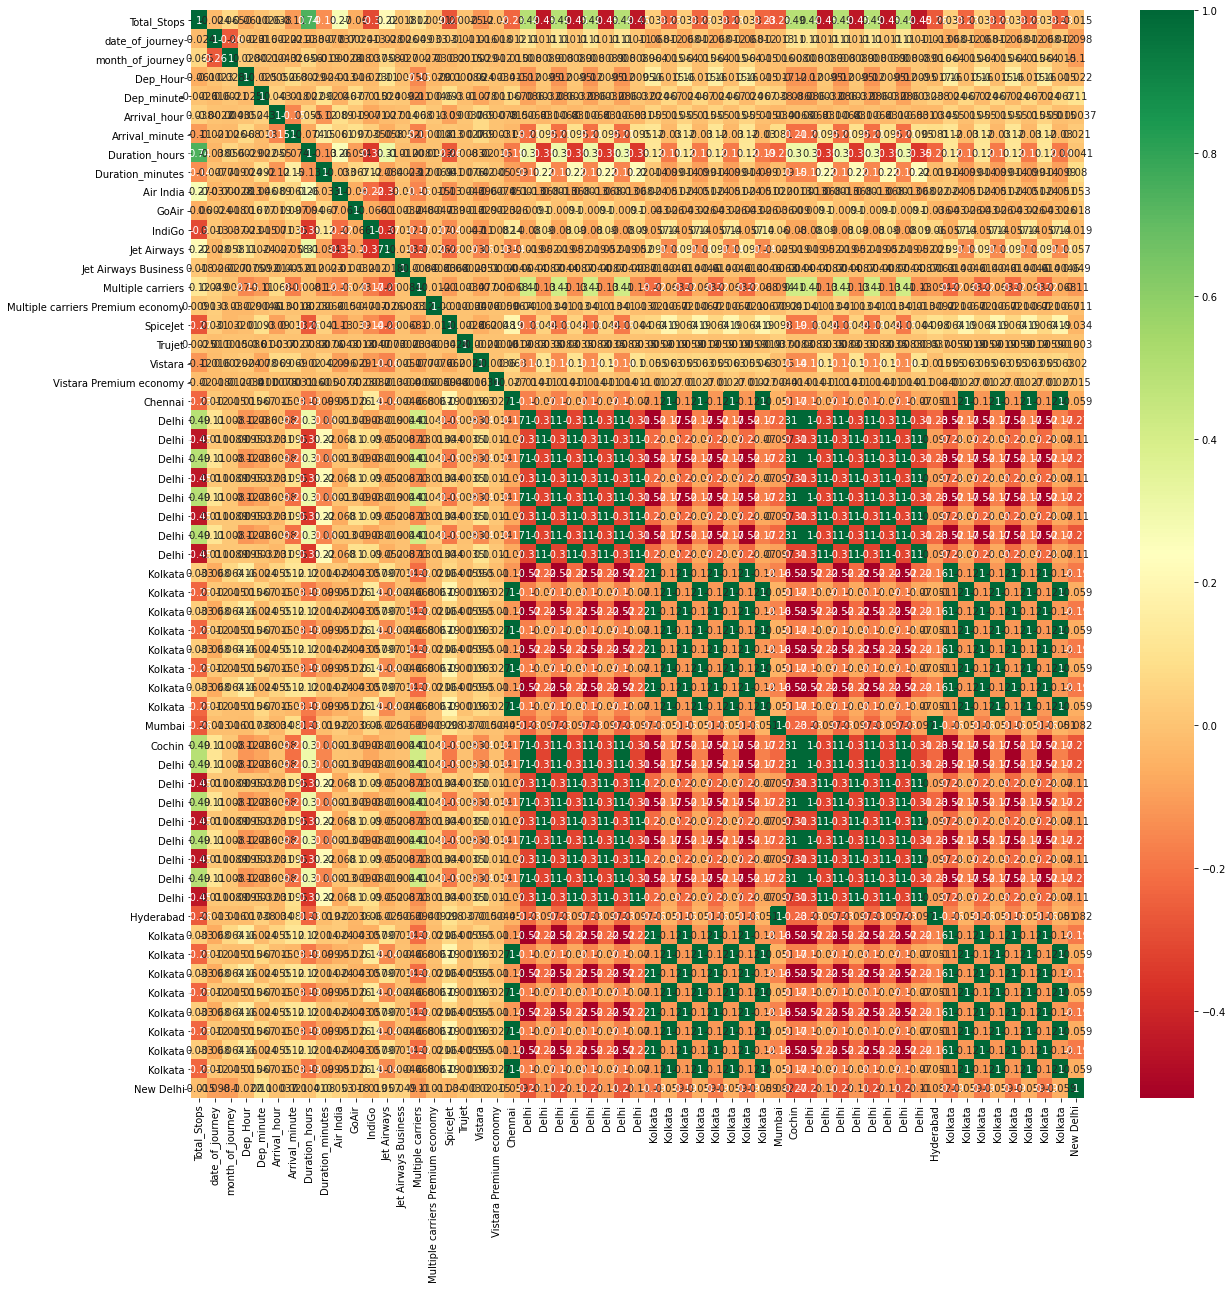

In [85]:
plt.figure(figsize=(20,20))
corr_matrix=data.iloc[:,:-1].corr()
top_feature=corr_matrix.index
sns.heatmap(data[top_feature].corr(),annot=True,cmap='RdYlGn')

In [91]:
threshold=0.5

def correlated(data,threshold):
    col_column=set()
    corr=data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                column=corr.index[i]
                col_column.add(column)
    return col_column
            

In [97]:
corr_m=correlated(data.iloc[:,:-1],threshold)
corr_m

{'Cochin', 'Delhi', 'Duration_hours', 'Hyderabad', 'Kolkata'}

In [101]:

pd.pandas.set_option('display.max_columns',None)
data.head()

,Total_Stops,date_of_journey,month_of_journey,Dep_Hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Price
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,7662
2,2,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,13882
3,1,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,6218
4,1,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


In [104]:
data.columns

Index(['Total_Stops', 'date_of_journey', 'month_of_journey', 'Dep_Hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Delhi', 'Kolkata',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Delhi', 'Hyderabad', 'Kolkata',
       'Kolkata', 'New Delhi', 'Price'],
      dtype='object')

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7477, 33)
(3205, 33)
(7477,)
(3205,)


## Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [112]:
pred=reg.predict(x_test)
pred[:5]

array([11288.20847895,  6845.83201081,  2961.98528413, 14390.45997525,
        5774.09083444])

In [113]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [117]:
reg.coef_

array([ 2.69271785e+03, -7.63397485e+01, -8.96563824e+01,  1.98102248e+01,
       -1.22189998e+00, -1.00630252e+01,  3.65058176e+00,  4.77196329e+00,
       -1.48256817e+00,  1.63803346e+03,  2.67780359e+01,  2.84044890e+02,
        4.32358256e+03,  4.76770677e+04,  3.71665588e+03,  4.72611832e+03,
       -2.46603332e+02, -2.04438624e+03,  2.16232788e+03,  3.18555755e+03,
       -1.15911559e+02, -8.90003741e+01, -6.47754328e+02, -1.91395704e+02,
       -1.15911559e+02, -9.86819798e+02, -8.90003741e+01, -8.90003741e+01,
       -6.47754328e+02, -9.86819798e+02, -1.91395704e+02, -1.15911559e+02,
        2.03088176e+03])

In [118]:
reg.intercept_

6076.76150707757

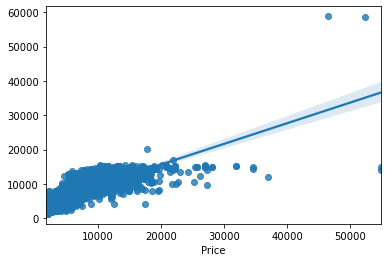

In [120]:
sns.regplot(y_test,pred)

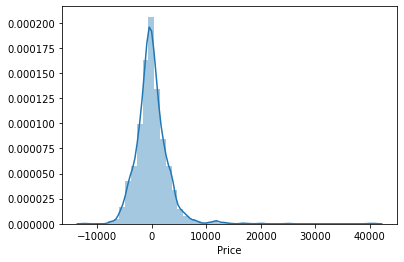

In [123]:
sns.distplot(y_test-pred,label='Price',kde=True)

In [128]:
print('MAE:{}',metrics.mean_absolute_error(y_test,pred))
print('MSE:{}',metrics.mean_squared_error(y_test,pred))
print('RMSE {}',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:{} 2027.9921932476402
MSE:{} 8936942.9875289
RMSE {} 2989.4720248781223


In [130]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x,y)

RandomForestRegressor()

In [131]:
pred1=random.predict(x_test)
pred1[:5]

array([13960.67404762,  5793.19      ,  3568.35342857, 16140.17666667,
        4864.9       ])

In [132]:
random.score(x_train,y_train)

0.9476314652399875

In [133]:
random.score(x_test,y_test)

0.9485870101020122

In [142]:
print('MAE:',metrics.mean_absolute_error(y_test,pred1))
print('MSE:',metrics.mean_squared_error(y_test,pred1))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,pred1)))

MAE: 615.6272478730232
MSE: 1110004.70296035
RMSE: 24.81183685004041


In [143]:
print(metrics.r2_score(y_test,pred1))

0.9485870101020122


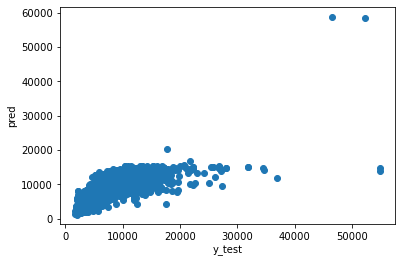

In [144]:
plt.scatter(y_test,pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

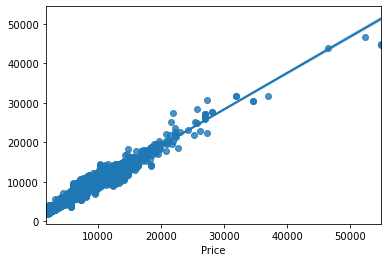

In [145]:
sns.regplot(y_test,pred1)

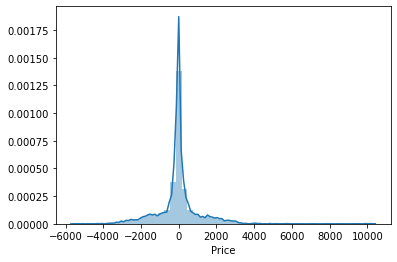

In [156]:
sns.distplot(y_test-pred1)

In [147]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=4)

In [148]:
tree.fit(x,y)

DecisionTreeRegressor(max_depth=4)

In [149]:
pred2=tree.predict(x_test)

In [151]:
pred2[:7]

array([12157.14598811,  8491.19098801,  3619.07234727,  6982.63815789,
        4781.1882805 , 12157.14598811, 12157.14598811])

In [152]:
tree.score(x_train,y_train)


0.694269430638308

In [153]:
tree.score(x_test,y_test)

0.6591779353097085

In [154]:
print('MAE: ',metrics.mean_absolute_error(y_test,pred2))
print('MSE: ',metrics.mean_absolute_error(y_test,pred2))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test,pred2)))

MAE:  1860.7725307152157
MSE:  1860.7725307152157
RMSE:  43.13667268943232


In [155]:
print(metrics.r2_score(y_test,pred2))

0.6591779353097085


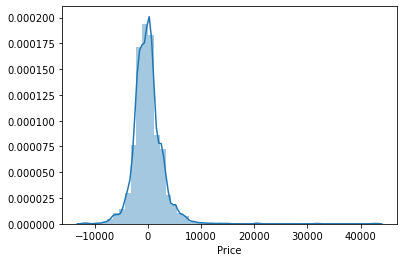

In [157]:
sns.distplot(y_test-pred2)